# Maximizing Revenue for Taxi Drivers through Payment Method Analysis

## Overview
In the competitive taxi booking industry, boosting revenue is crucial for sustained success and driver satisfaction. This study leverages data-driven insights to optimize revenue streams for taxi drivers by examining the impact of payment methods on fare prices.

## Objective
The primary aim of this project is to conduct an A/B test to investigate the correlation between total fare amounts and payment methods. By applying Python-based hypothesis testing and descriptive statistics, we seek to uncover actionable insights that could help drivers increase their earnings. Specifically, the focus is on comparing fares paid via credit cards versus cash payments.

## Research Question
Does the total fare amount differ based on the payment type, and can encouraging customers to use payment methods associated with higher fares boost driver revenue without compromising the overall customer experience?

In [83]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
import math
warnings.filterwarnings('ignore')


In [85]:
#Loading the dataset
df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [87]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [89]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [91]:
#Convert object data types to datetime

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [92]:
#Calculate duration of ride in minutes
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [93]:
#Filter out the unnecessary columns by selecting only the necessary ones
df = df[['passenger_count', 'payment_type', 'fare_amount' ,'trip_distance', 'duration']]

In [97]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [99]:
#Check for missing Values in each column
df.isnull().sum()  # Summarize the count of missing values per column

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [101]:
#Calculate the percentage of missing values

(65441/len(df))*100

1.021716132126611

In [103]:
#Since the missing values are only 1% of the dataset, we can simply drop the missing values

df.dropna(inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [105]:
# passenger_count and payment_type values can never be float so convert them into integer

df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')


In [107]:
#Check for duplicate values
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [109]:
# There are more than 3.3M duplicates.
# Drop the duplicate values.

df.drop_duplicates(inplace=True)
df.shape

(3007861, 5)

In [111]:
# Check the distribution of passenger_count
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [113]:
# Check the distribution of payment_type
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [115]:
#Filter out all other payment_types other than card and cash because we can only perform analysis on successful transactions.
# 1 --> card
# 2 --> cash
df = df[df['payment_type']<3]

#Filter out all passenger_count > 6 because they are outliers and passenger_count = 0 does not make sense
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [117]:
df.shape

(2780283, 5)

In [119]:
#Re-Write payment_type of 1 and 2 with 'card' and 'cash'
df['payment_type'].replace([1,2],['Card', 'Cash'], inplace = True)

In [121]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [123]:
#fare_amount, trip_distance and duration cannot be negative, so filter the negative data
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [125]:
# Removing outliers in fare_amount, trip_distance, and duration using the IQR (Interquartile Range) method
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)  # First quartile
    q3 = df[col].quantile(0.75)  # Third quartile
    IQR = q3-q1                  # Interquartile range

    lower_bound = q1 - 1.5 * IQR # Lower boundary for outliers
    upper_bound = q3 + 1.5 * IQR # Upper boundary for outliers

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # Filter rows within the acceptable range

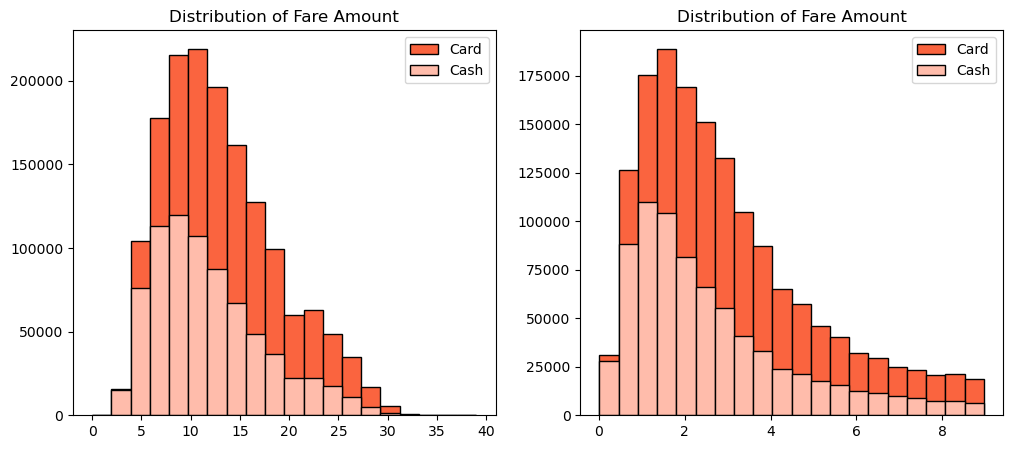

In [127]:
# Plot histograms to compare the distribution of fare_amount and trip_distance between card and cash payments

plt.figure(figsize=(12,5))

# Subplot 1: Distribution of fare_amount
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

# Subplot 2: Distribution of trip_distance
plt.subplot(1,2,2)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

plt.show()

In [129]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [131]:
# Group data by payment_type and calculate mean and std for fare_amount and trip_distance
df.groupby('payment_type').agg({'fare_amount':['mean', 'std'], 'trip_distance':['mean', 'std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

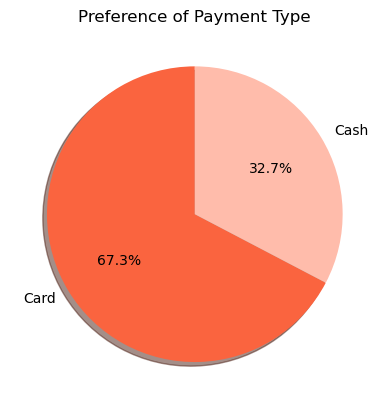

In [133]:
# Plot the preference of payment type as a pie chart
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), # Proportions of each payment_type
        labels = df['payment_type'].value_counts().index,  # Labels for each slice
        startangle = 90,                                   # Start angle for the pie chart
        shadow = True,                                     # Add shadow effect
        autopct = '%1.1f%%',                               # Show percentages
        colors = ['#FA643F', '#FFBCAB'])                   # Colors for each slice
plt.show()

In [135]:
# Create a grouped count of payment_type by passenger_count
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace= True)

In [137]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count # Display the grouped DataFrame

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [139]:
# Prepare a new DataFrame (df1) for plotting passenger_count distribution by payment_type
df1 = pd.DataFrame(columns=['payment_type',1,2,3,4,5])  # Create an empty DataFrame with these columns
df1['payment_type']=['Card', 'Cash']                    # Set payment_type rows

# Fill in passenger_count percentage data
df1.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df1.iloc[1,1:]=passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


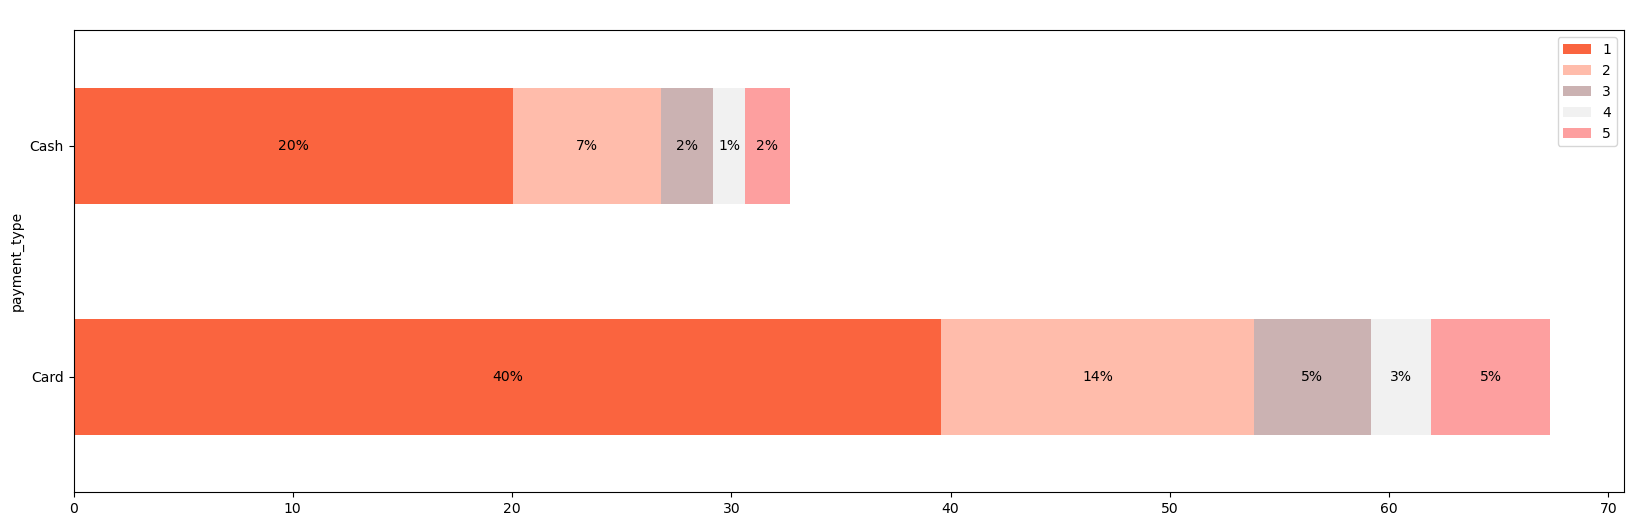

In [141]:
# Plot a horizontal stacked bar chart for passenger_count distribution
fig, ax = plt.subplots(figsize=(20, 6)) 
df1.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F']) # Stack bar segments by passenger_count

# Add percentage text to each segment of the bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),             # Format percentage without decimals
            horizontalalignment='center',
            verticalalignment='center')

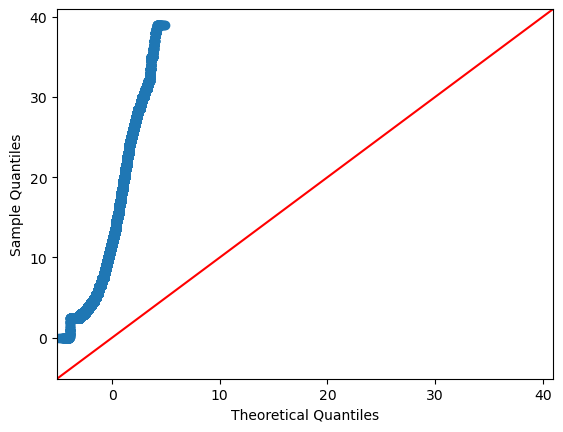

In [143]:
# QQ plot to visually assess if fare_amount is normally distributed
fig = sm.qqplot(df['fare_amount'], line = '45')
plt.show()

Because the data points deviate from the red 45-degree line, it is clear they are not normally distributed, which makes a z-test inappropriate. Consequently, a t-test is more suitable. The t-test works with both small and large samples and does not require knowing the population standard deviation, making it widely applicable for hypothesis testing in real-world research, including taxi trip data.

When analyzing NYC Yellow Taxi Trip Records—where the population standard deviation is unknown and the sample can be very large—a t-test provides a more practical and flexible way to compare mean values between two groups (such as fare amounts paid by credit card vs. cash). It reliably allows us to draw inferences about the larger population while managing the uncertainty involved in estimating population parameters.

Hypotheses

Null Hypothesis (H₀): 
The average fare does not differ between customers who pay by credit card and those who pay by cash.
Alternative Hypothesis (H₁): 
    The average fare differs between customers who pay by credit card and those who pay by cash.

In [147]:
# Divide data into two samples based on payment type
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [149]:
# Perform independent t-test (Welch's t-test) to compare means of the two payment types
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)

# Print the t-statistic and p-value from the test
print('T statistic:', t_stats, 'p-value:', p_value)

T statistic: 169.2111527245052 p-value: 0.0


Results

- T-statistic: 165.59915491544626
- P-value: 0.0

Since the p-value is far below the standard 5% significance level, we reject the null hypothesis. We can conclude that there is a significant difference in the average fare between credit card and cash payments.

From a business perspective, this suggests that encouraging credit card payments may lead to higher overall revenue for taxi drivers.